In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
train_df = pd.read_csv('train_set.csv',sep='\t')

In [3]:
train_df.shape

(200000, 2)

In [4]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [5]:
train_df['text_len'] = train_df['text'].apply(lambda x:len(x.split(' ')))
print(train_df['text_len'].describe())

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


Text(0.5, 1.0, 'Histogram of char count')

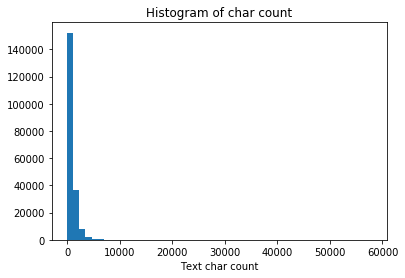

In [6]:
plt.hist(train_df['text_len'],bins=50)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

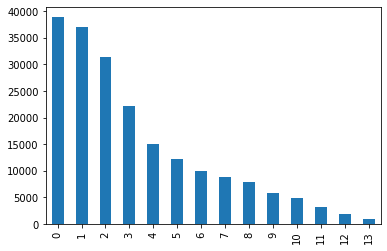

In [7]:
train_df['label'].value_counts().plot(kind='bar')

In [25]:
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
# reverse = True 降序 
word_count = sorted(word_count.items(),key= lambda d:d[1],reverse = True)

In [26]:
word_count[:10]

[('3750', 216107),
 ('648', 140549),
 ('900', 93683),
 ('3370', 56552),
 ('6122', 46538),
 ('4464', 43158),
 ('7399', 41280),
 ('4939', 39397),
 ('3659', 34566),
 ('4811', 33071)]

这里还可以根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号。

### 作业

#### 假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？

In [8]:
def count_func(text):
    word_list = text.split(" ")
    res = 0
    for word in word_list:
        if word=='3570' or word == '900' or word =='648':
            res += 1
    return res

In [9]:
train_df['sentence_count'] = train_df['text'].apply(lambda x:count_func(x))

In [11]:
train_df['sentence_count'].mean()

40.939545

Text(0.5, 1.0, 'Histogram of Sentence count')

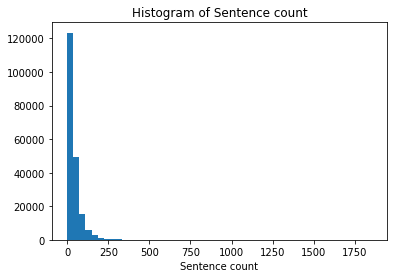

In [12]:
plt.hist(train_df['sentence_count'],bins=50)
plt.xlabel('Sentence count')
plt.title("Histogram of Sentence count")

####  统计每类新闻中出现次数对多的字符

In [13]:
train_gby = train_df.groupby('label')

In [56]:
train_gby0 = train_gby.get_group(0)
train_gby1 = train_gby.get_group(1)
train_gby2 = train_gby.get_group(2)
train_gby3 = train_gby.get_group(3)
train_gby4 = train_gby.get_group(4)
train_gby5 = train_gby.get_group(5)
train_gby6 = train_gby.get_group(6)
train_gby7 = train_gby.get_group(7)
train_gby8 = train_gby.get_group(8)
train_gby9 = train_gby.get_group(9)
train_gby10 = train_gby.get_group(10)
train_gby11 = train_gby.get_group(11)
train_gby12 = train_gby.get_group(12)
train_gby13 = train_gby.get_group(13)

In [14]:
def count_word(train_gby_ele):
    all_lines = ' '.join(list(train_gby_ele['text']))
    word_count = Counter(all_lines.split(" "))
    # reverse = True 降序 
    word_count = sorted(word_count.items(),key= lambda d:d[1],reverse = True)
    print(word_count[0])

In [15]:
for i in range(14):
    print("label:",i)
    train_gby_item = train_gby.get_group(i)
    count_word(train_gby_item)

label: 0
('3750', 1267331)
label: 1
('3750', 1200686)
label: 2
('3750', 1458331)
label: 3
('3750', 774668)
label: 4
('3750', 360839)
label: 5
('3750', 715740)
label: 6
('3750', 469540)
label: 7
('3750', 428638)
label: 8
('3750', 242367)
label: 9
('3750', 178783)
label: 10
('3750', 180259)
label: 11
('3750', 83834)
label: 12
('3750', 87412)
label: 13
('3750', 33796)
